In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
save_path = os.environ.get("SAVE_PATH")
BASE_LOAD_PATH = Path.home() / save_path
wp_st = pd.read_csv(BASE_LOAD_PATH / "serving_time_wp.csv")
sq_st = pd.read_csv(BASE_LOAD_PATH / "serving_time_slateq.csv")

In [4]:
res_df = pd.concat([wp_st, sq_st])

In [5]:
import re

# define the pattern to match the string
pattern = r'^WA-SlateQ-(\d+)$'

# define a function to replace the string
def replace_string(string):
    # check if the string matches the pattern
    match = re.match(pattern, string)
    if match:
        # extract the number from the pattern and add a percentage symbol
        num = match.group(1)
        new_string = 'SlateWolpertinger ' + num + '%'
        return new_string
    else:
        # if the string does not match the pattern, return the original string
        return string

In [6]:
res_df["model_name"] = res_df["model_name"].apply(replace_string)

In [7]:
res_df = res_df.reset_index(drop=True).sort_index(ascending=False)

In [8]:
res_df

,model_name,num_candidates,serving_time
15,SlateQ,2000,0.380318
14,SlateQ,1000,0.185371
13,SlateQ,500,0.090081
12,SlateQ,300,0.061311
11,SlateWolpertinger 20%,2000,0.093549
10,SlateWolpertinger 20%,1000,0.044542
9,SlateWolpertinger 20%,500,0.018965
8,SlateWolpertinger 20%,300,0.012567
7,SlateWolpertinger 10%,2000,0.047475
6,SlateWolpertinger 10%,1000,0.018455


In [9]:
from setup_plot import setup_plot
setup_plot(font_size=8, w_pts=506*0.6, fig_ratio=0.5)

In [10]:
sns.set_style("whitegrid", {"grid.linestyle": "--", "axes.edgecolor": "black"})

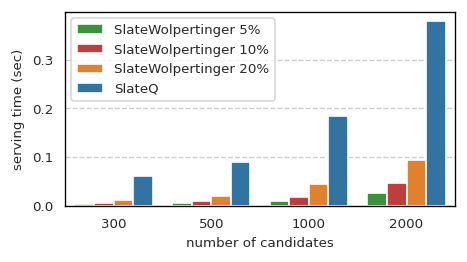

In [14]:
sns.barplot(data=res_df, x="num_candidates", y="serving_time", hue="model_name", hue_order=["SlateWolpertinger 5%", "SlateWolpertinger 10%", "SlateWolpertinger 20%", "SlateQ"], palette=["#2ca02c", "#d62728","#ff7f0e", "#1f77b4"])
plt.ylabel("serving time (sec)")
plt.xlabel("number of candidates")
plt.legend(title="")
plt.savefig("./serving_time.pdf", dpi=300, bbox_inches='tight')


In [52]:
res_df[(res_df["num_candidates"] == 2000) & (res_df["model_name"] == "Slate-Wolpertinger 20%")]

,model_name,num_candidates,serving_time
11,Slate-Wolpertinger 20%,2000,0.093549


In [53]:
res_df[(res_df["num_candidates"] == 2000) & (res_df["model_name"] == "SlateQ")]

,model_name,num_candidates,serving_time
15,SlateQ,2000,0.380318


In [54]:
0.380318/0.093549

4.065441640209944